This is for reproducing Fig.3 in Rep. Prog. Phys. 76 (2013) 036502.

In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
#
np.set_printoptions(precision=3)
#Mathematical constants
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
#Physical constants
sol = 137.0 #speed of light
aB = 0.05292 #nanometer
Hartree = 27.21 #eV
Atomtime = 0.02419 #fs
Atomfield = Hartree/aB #V/nm
Atomvolume = aB**3 #nm^3
ch = 1240.0 #eV * nm
chbar = 197.3 # eV * nm
halfepsc = 3.509e16 # W/cm^2 \frac{1}{2}*\epsilon_0 * c 
Atomfluence = halfepsc*Atomtime*1.0e-15 # J/cm^2 ,W/cm^2 * fs = femto J/cm^2

In [3]:
from Keldysh_funcs.functions import *

In [4]:
#Default value
delta = 6.50  #gap in eV
m = 0.50      #effective mass
omega = 1.55  #photon energy in eV

#Unit conversion
delta = delta/Hartree          #Convert to atomic unit
omega = omega/Hartree          #Convert to atomic unit

print ('++++++++')
print ('Material properties')
print ('Effective mass: m ='+str(m)+' [electron mass]')
print ('Band gap: delta ='+str(delta)+' [a.u.] ='+str(delta*Hartree)+' [eV]')
print ('Frequency: omega ='+str(omega)+' [a.u.] ='+str(omega*Hartree)+' [eV]')
print ('++++++++')

++++++++
Material properties
Effective mass: m =0.5 [electron mass]
Band gap: delta =0.23888276368981992 [a.u.] =6.5 [eV]
Frequency: omega =0.0569643513414186 [a.u.] =1.55 [eV]
++++++++


In [7]:
NF = 1000
Fmin = 1.0/Atomfield
Fmax = 100.0/Atomfield
r = (Fmax/Fmin)**(1.0/float(NF-1))

F = np.zeros(NF,dtype=float)
W = np.zeros(NF,dtype=float)
WMP = np.zeros(NF,dtype=float)
WTUN = np.zeros(NF,dtype=float)
WTUNYS = np.zeros(NF,dtype=float)
for iF in range (NF):
    F[iF] = Fmin*r**iF
    W[iF] = get_W(m,delta,omega,F[iF])
    WMP[iF] = get_WMP(m,delta,omega,F[iF])
    WTUN[iF] = get_WTUN(m,delta,omega,F[iF])

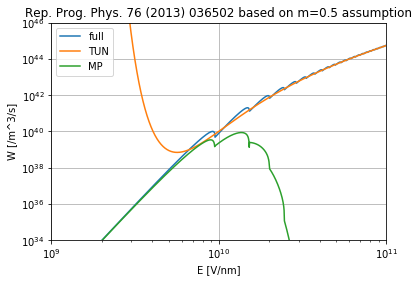

In [9]:
plt.figure()
plt.title('Rep. Prog. Phys. 76 (2013) 036502 based on m='+str(m)+' assumption')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.0e9,1.0e11)
plt.xlabel('E [V/nm]')
plt.ylim(1.0e34,1.0e46)
plt.ylabel('W [/m^3/s]')
plt.plot(F*Atomfield*1.0e9,W/Atomvolume/Atomtime*1.0e42,label='full')
plt.plot(F*Atomfield*1.0e9,WTUN/Atomvolume/Atomtime*1.0e42,label='TUN')
plt.plot(F*Atomfield*1.0e9,WMP/Atomvolume/Atomtime*1.0e42,label='MP')
plt.grid()
plt.legend()
plt.show()